In [1]:
# ---------------------- IMPORT LIBRARIES --------------------------
import os 
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer


# handle warnings
warnings.filterwarnings('ignore')



# --------------------- HANDLING DIRECTORY -------------------------

# parent folder director
parent_dir = Path.cwd().parent

# data directory
data_dir = parent_dir / "data"

# dataset directory
dataset_dir = data_dir / "Loan_Default.csv"

# Add parent directory to system
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

In [2]:
# import Function from module
from modules.preprocess_2 import numerical_cols, categorical_cols, log_transform_cols
from modules.preprocess_2 import clean_data
from modules.preprocess_2 import get_preprocessing_pipeline
from modules.preprocess_2 import transform_data
from modules.preprocess_2 import load_and_split_data 
from modules.preprocess_2 import get_transformed_df

In [3]:
# Clean data 
df = clean_data(pd.read_csv(dataset_dir))

df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,loan_amount,Interest_rate_spread,Upfront_charges,...,credit_type,co-applicant_credit_type,submission_of_application,LTV,Region,Security_Type,Status,dtir1,age_numerical,Credit_Score_Group
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,116500,NaN,NaN,...,EXP,CIB,to_inst,98.728814,south,direct,1,45.0,29.5,Very Good
1,cf,Male,nopre,type2,p1,l1,nopc,206500,NaN,NaN,...,EQUI,EXP,to_inst,NaN,North,direct,1,NaN,59.5,Poor
2,cf,Male,pre,type1,p1,l1,nopc,406500,0.2000,595.0,...,EXP,CIB,to_inst,80.019685,south,direct,0,46.0,39.5,Excellent
3,cf,Male,nopre,type1,p4,l1,nopc,456500,0.6810,NaN,...,EXP,CIB,not_inst,69.376900,North,direct,0,42.0,49.5,Fair
4,cf,Joint,pre,type1,p1,l1,nopc,696500,0.3042,0.0,...,CRIF,EXP,not_inst,91.886544,North,direct,0,39.0,29.5,Fair


In [4]:
# get preprocessing pipeline
pipeline = get_preprocessing_pipeline()

pipeline.steps

[('data_cleaning',
  FunctionTransformer(func=<function clean_data at 0x000001EF8FFBF4C0>)),
 ('preprocessor',
  ColumnTransformer(transformers=[('log_num',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('log_transform',
                                                    FunctionTransformer(func=<ufunc 'log1p'>)),
                                                   ('scalar', StandardScaler())]),
                                   ['loan_amount', 'income', 'Upfront_charges',
                                    'Interest_rate_spread', 'dtir1']),
                                  ('num',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scalar', Stan...
                                

In [5]:
# load and split data

X_train, X_test, y_train, y_test = load_and_split_data()

In [6]:
# transform data

X_train, X_test, pipeline = transform_data()

In [7]:
# transformed dataframe
df_trans = get_transformed_df()

df_trans.head()

,loan_amount,income,Upfront_charges,Interest_rate_spread,dtir1,LTV,age_numerical,loan_limit_ncf,Gender_Joint,Gender_Male,...,term_322.0,term_324.0,term_336.0,term_348.0,term_360.0,Credit_Score_Group_Fair,Credit_Score_Group_Good,Credit_Score_Group_Poor,Credit_Score_Group_Very Good,Status
141039,-0.555165,0.182800,-0.039564,-2.430172,-3.792472,-2.536675,1.370689,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
121276,0.863453,-0.036221,-0.487360,-0.345545,0.905928,-0.163195,-0.082704,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
11214,0.242313,-0.645258,0.375590,0.080035,1.257591,-1.484969,0.643992,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
129659,-0.177727,0.837130,0.492038,1.096457,0.213504,0.908243,0.643992,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13370,-0.929951,-0.916299,0.588151,-0.103990,1.086738,0.201294,1.370689,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


## LOG TRANSFORMED FEATURES ANALYSIS

In [8]:
log_transform_cols

['loan_amount', 'income', 'Upfront_charges', 'Interest_rate_spread', 'dtir1']

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'Upfront_charges'}>,
        <Axes: title={'center': 'Interest_rate_spread'}>],
       [<Axes: title={'center': 'dtir1'}>, <Axes: >]], dtype=object)

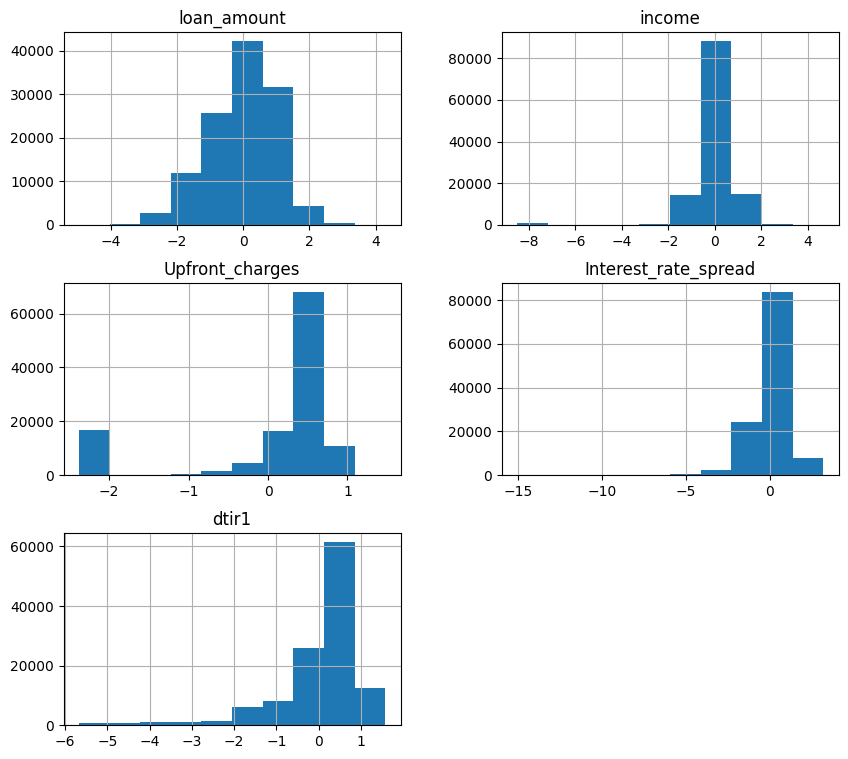

In [9]:
df_trans[log_transform_cols].hist(figsize=(10,9))

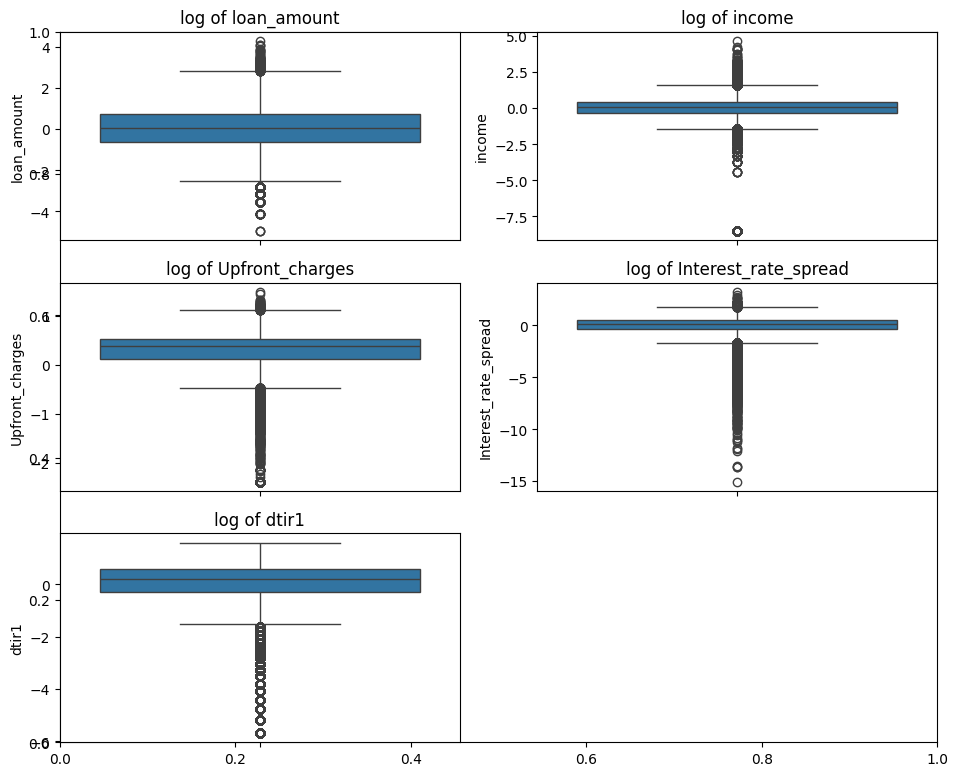

In [10]:
# boxplot of log transformed features

fig, ax = plt.subplots(figsize = (10, 8))

for i, cols in enumerate(log_transform_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df_trans[cols])
    plt.title(f'log of {cols}')

plt.tight_layout()
plt.show()

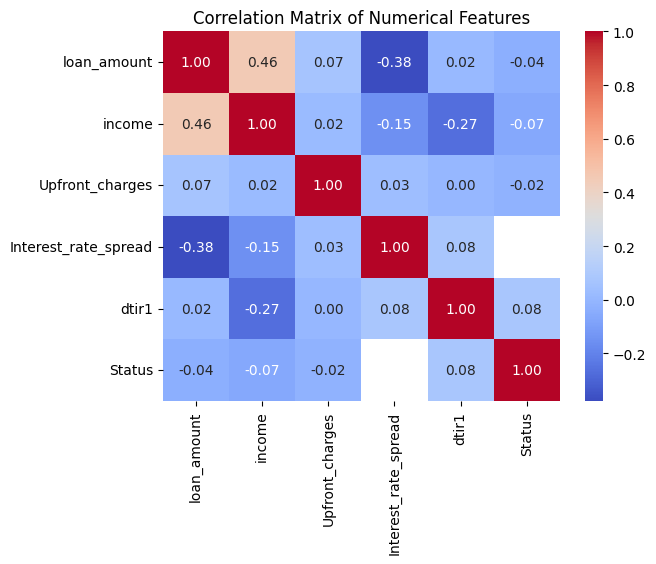

In [11]:
# ---------- MULTIVARIANT ANALYSIS --------
 

# correlatiom matrix
corr = df[log_transform_cols + ['Status']].corr()

# heatmap of log transformed features
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm',
    fmt='.2f'
)

plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Other Numerical Columns Analysis

In [12]:
numerical_cols

['LTV', 'age_numerical']

In [13]:
df_num = df_trans[numerical_cols]

df_num.head()

,LTV,age_numerical
141039,-2.536675,1.370689
121276,-0.163195,-0.082704
11214,-1.484969,0.643992
129659,0.908243,0.643992
13370,0.201294,1.370689


In [14]:
# ------- INFORMATION SUMMARY -------

df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118936 entries, 141039 to 118320
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LTV            118936 non-null  float64
 1   age_numerical  118936 non-null  float64
dtypes: float64(2)
memory usage: 2.7 MB


In [15]:
# -------- MISSING VALUES ANALYSIS -----------

# Calculate the missing Values
missing_value = df_num.isnull().sum()

missing_value[missing_value > 0]

Series([], dtype: int64)

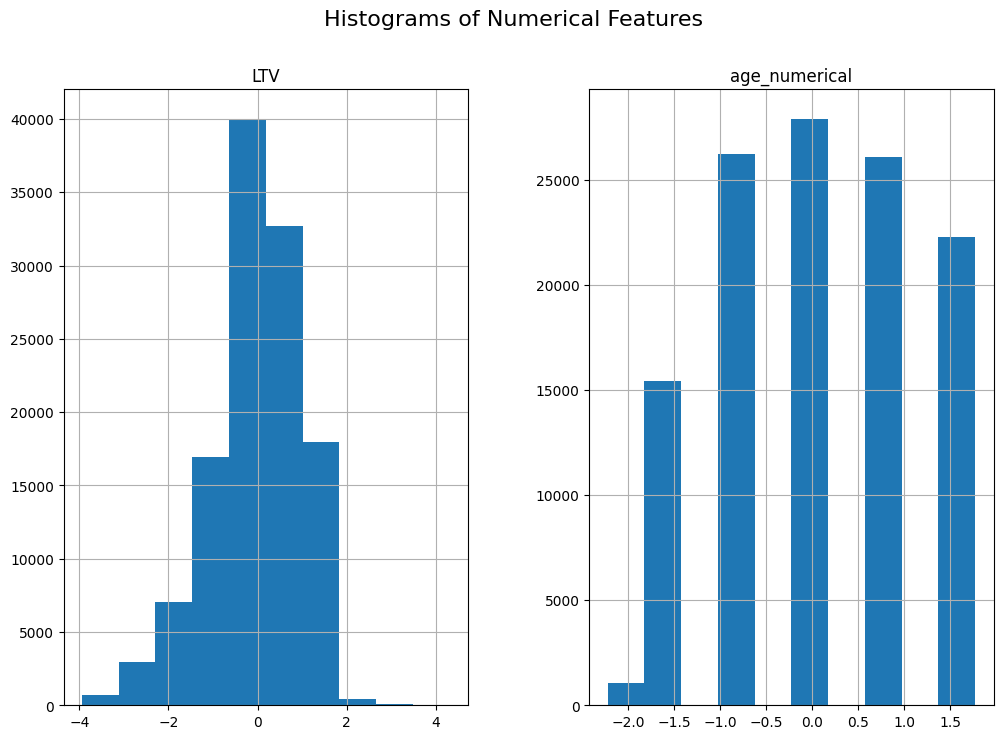

In [16]:
# ------ UNIVARIANT ANALYSIS -------

df_num.hist(figsize=(12,8))
plt.suptitle('Histograms of Numerical Features', fontsize=16)

plt.show()

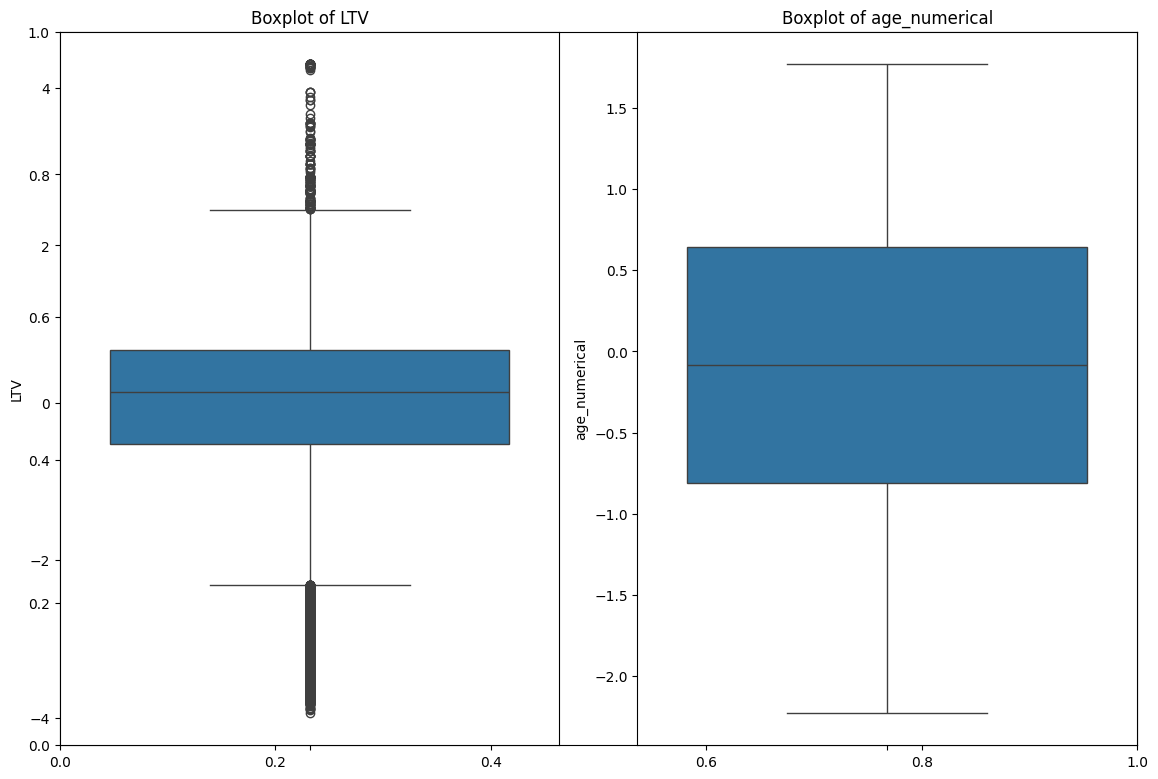

In [17]:
# ------- Boxplots of Numerical Features -------

fig, ax = plt.subplots(figsize=(12, 8))
for i, cols in enumerate(numerical_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df_num[cols])
    plt.title(f'Boxplot of {cols}')

plt.tight_layout()
plt.show()

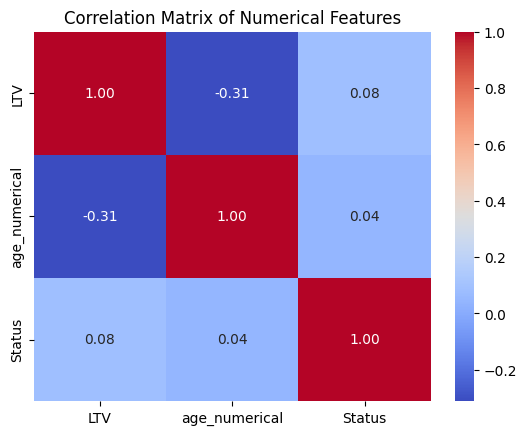

In [18]:
# ---------- MULTIVARIANT ANALYSIS -------- 

# correlatiom matrix
corr = df[numerical_cols + ['Status']].corr()

# heatmap of log transformed features
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm',
    fmt='.2f'
)

plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
# ---------- COMPLETE NUMERICAL COLS ANALYSIS --------------

# Numerical Features
num_feat = log_transform_cols + numerical_cols

num_feat

['loan_amount',
 'income',
 'Upfront_charges',
 'Interest_rate_spread',
 'dtir1',
 'LTV',
 'age_numerical']

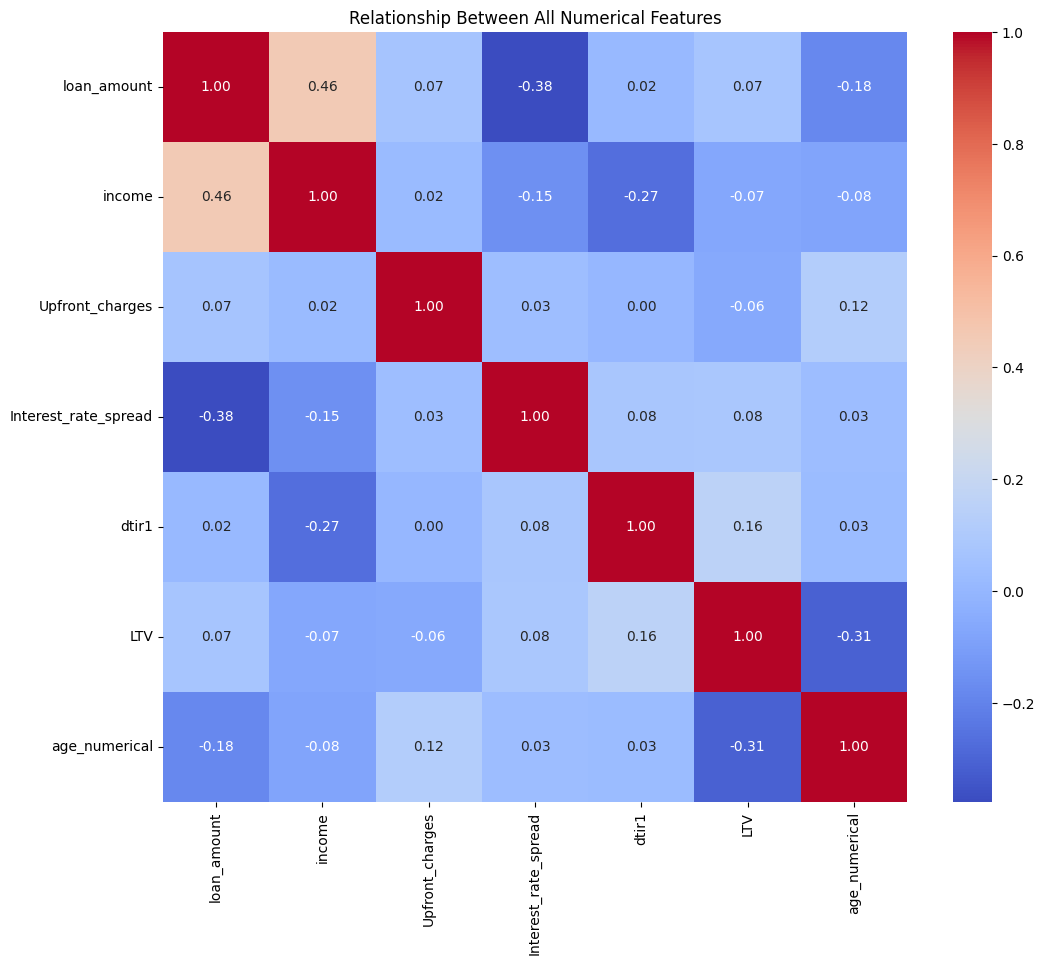

In [20]:
# Complete Numeric Feature dataframe correlation matrix
corr = df[num_feat].corr()

# plot heat map
fig = plt.figure(figsize = (12, 10))

sns.heatmap(
    corr,
    annot= True,
    fmt='.2f',
    cmap= 'coolwarm'
)

plt.title("Relationship Between All Numerical Features")
plt.show()

## EDA ON TRANSFORMED CATEGORICAL FEATURES ---

In [21]:
num_cols = log_transform_cols + numerical_cols

num_cols

['loan_amount',
 'income',
 'Upfront_charges',
 'Interest_rate_spread',
 'dtir1',
 'LTV',
 'age_numerical']

In [22]:
# Filter transformed categorical features alone
df_cat = df_trans.drop(columns = num_cols)

df_cat.head()

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,...,term_322.0,term_324.0,term_336.0,term_348.0,term_360.0,Credit_Score_Group_Fair,Credit_Score_Group_Good,Credit_Score_Group_Poor,Credit_Score_Group_Very Good,Status
141039,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
121276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
11214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
129659,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13370,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [23]:
# ---------- SUMMARY INFORMATION -----------
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118936 entries, 141039 to 118320
Data columns (total 60 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   loan_limit_ncf                     118936 non-null  float64
 1   Gender_Joint                       118936 non-null  float64
 2   Gender_Male                        118936 non-null  float64
 3   Gender_Sex Not Available           118936 non-null  float64
 4   approv_in_adv_pre                  118936 non-null  float64
 5   loan_type_type2                    118936 non-null  float64
 6   loan_type_type3                    118936 non-null  float64
 7   loan_purpose_p2                    118936 non-null  float64
 8   loan_purpose_p3                    118936 non-null  float64
 9   loan_purpose_p4                    118936 non-null  float64
 10  Credit_Worthiness_l2               118936 non-null  float64
 11  open_credit_opc                    1189

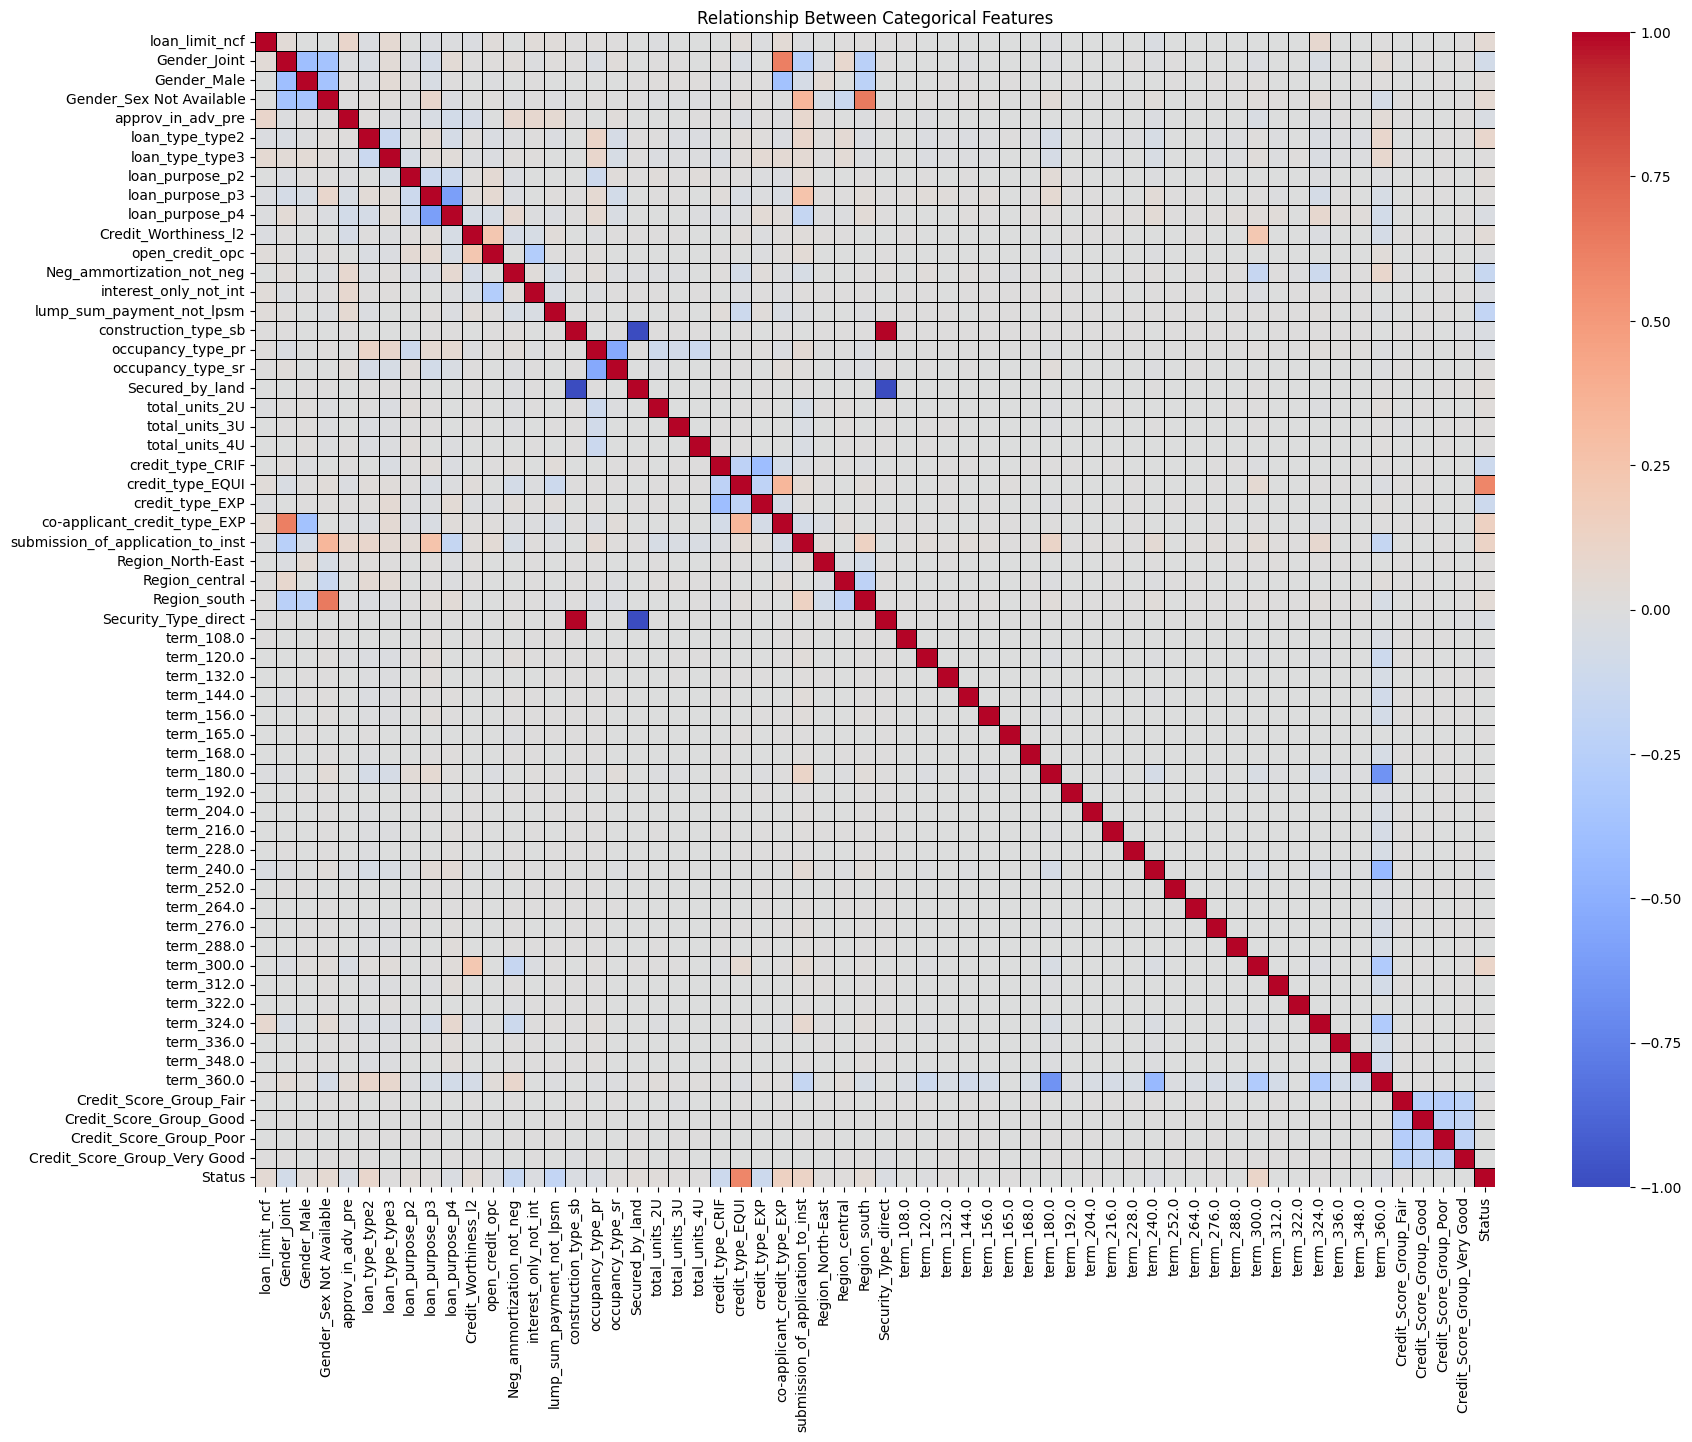

In [24]:
# -------- MULTIVARIANT ANALYSIS ----------

# correlation matrix
corr = df_cat.corr()

fig = plt.figure(figsize=(20, 15))

# heatmap
sns.heatmap(
    corr,
    cmap= 'coolwarm',
    linewidths=0.5,
    linecolor='black',
)

plt.title("Relationship Between Categorical Features")
plt.show()

Text(0.5, 0, 'Correlation')

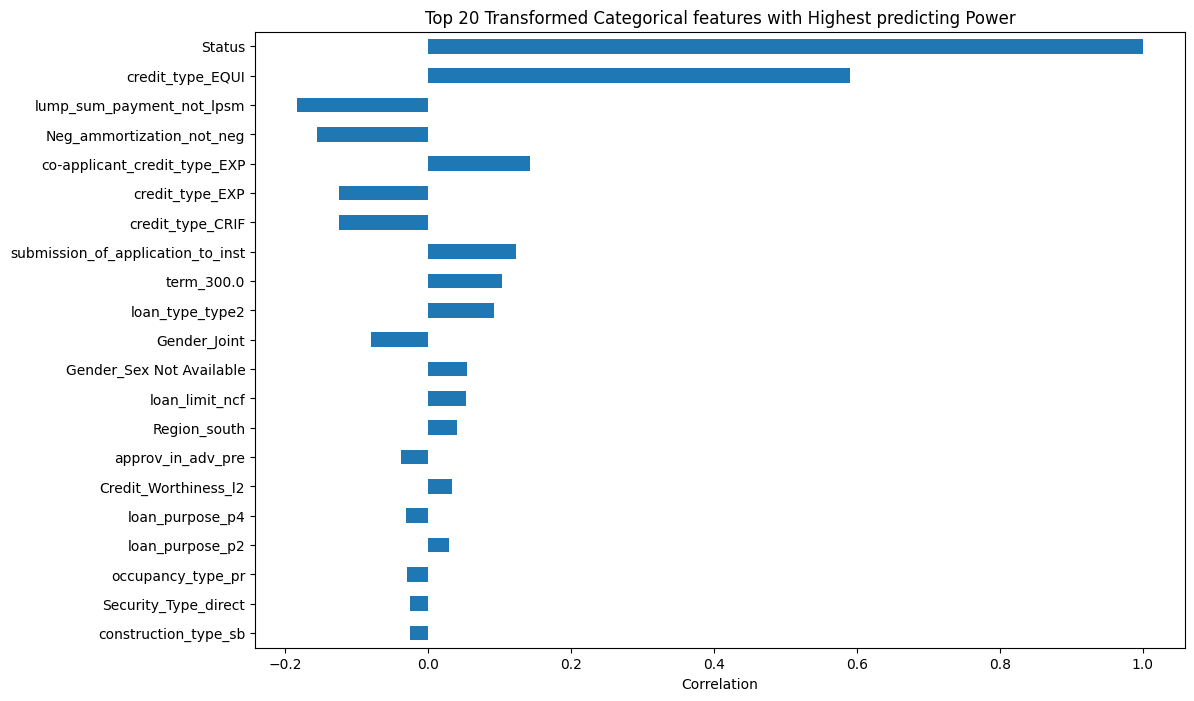

In [25]:
# ------ Correlation Bar ------------

# correlation with Target feature (top 20)
corr_bar = corr['Status'].sort_values(key=np.abs, ascending=True).tail(21)

corr_bar.plot(kind='barh', figsize=(12, 8))
plt.title('Top 20 Transformed Categorical features with Highest predicting Power')
plt.xlabel('Correlation')

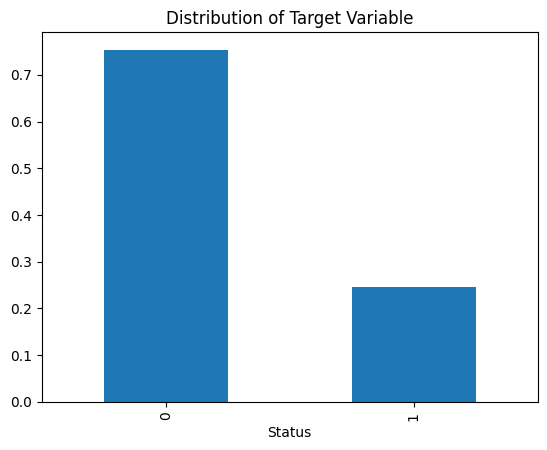

In [26]:
# ----- BALANCE TARGET VARIABLE CHECK -----

df_cat["Status"].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Status')
plt.show()